In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
ls data

data_120_120_norm.npz          data_pca_50_y_mean.pickle.npz
data_14400_norm.npz            df_images_120_120.pickle


In [7]:
data = np.load('./data/data_pca_50_y_mean.pickle.npz')

In [9]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [12]:
x_train.shape , x_test.shape

((178, 50), (45, 50))

In [13]:
#Training the model - SVM
from sklearn.svm import SVC

In [18]:
model = SVC(C=1.0, kernel='rbf', gamma=0.01, probability=True)

In [19]:
model.fit(x_train, y_train)

SVC(gamma=0.01, probability=True)

In [20]:
#score
model.score(x_train, y_train)

0.9887640449438202

In [21]:
model.score(x_test, y_test)

0.9555555555555556

Model Evaluation
- Confusion Matrix
- Classification Report
- Kappa Score 
- ROC and AUC (probability)

In [22]:
from sklearn import metrics

In [25]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) #probability

Text(0, 0.5, 'True Values')

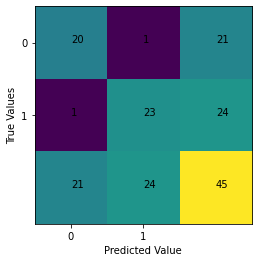

In [39]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)), axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)), axis=1)


plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,cm[i,j])
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Value')
plt.ylabel('True Values')

In [44]:
cr = metrics.classification_report(y_test, y_pred, target_names=['Bosak','Tusk'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
Bosak,0.952381,0.952381,0.952381,21.000000
Tusk,0.958333,0.958333,0.958333,24.000000
accuracy,0.955556,0.955556,0.955556,0.955556
macro avg,0.955357,0.955357,0.955357,45.000000
weighted avg,0.955556,0.955556,0.955556,45.000000


In [45]:
#Kappa score - random accuracy
metrics.cohen_kappa_score(y_test, y_pred)
#Should be more than 60%!

0.9107142857142857

In [48]:
fpr, tpr, thresh = metrics.roc_curve(y_test,y_prob[:,1])

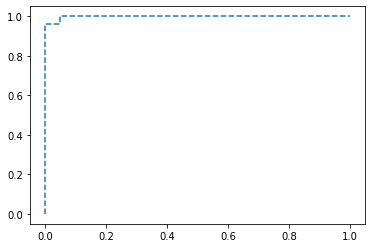

In [49]:
plt.plot(fpr, tpr, '--')

In [50]:
from sklearn.model_selection import GridSearchCV

In [52]:
model_tune = SVC()

In [51]:
param_grid = {'C':[1,10,20,30,50,100],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002],
             'coef0':[0,1]}

In [53]:
#Hyper Parameter Tuning
model_grid = GridSearchCV(model_tune, param_grid=param_grid,scoring='accuracy',cv=5,verbose=1)

In [54]:
model_grid.fit(X,y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [56]:
model_grid.best_params_

{'C': 10, 'coef0': 1, 'gamma': 0.01, 'kernel': 'poly'}

In [57]:
model_grid.best_score_

0.9684848484848485

In [60]:
model_best = SVC(C=10,kernel='poly',gamma=0.01,coef0=1, probability=True)

In [61]:
model_best.fit(x_train, y_train)
model_best.score(x_test,y_test)

1.0

In [62]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test) #probability

Text(0, 0.5, 'True Values')

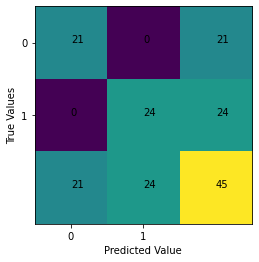

In [63]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)), axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)), axis=1)


plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,cm[i,j])
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Value')
plt.ylabel('True Values')

In [64]:
cr = metrics.classification_report(y_test, y_pred, target_names=['Bosak','Tusk'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
Bosak,1.0,1.0,1.0,21.0
Tusk,1.0,1.0,1.0,24.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,45.0
weighted avg,1.0,1.0,1.0,45.0


In [66]:
#saving model
import pickle
pickle.dump(model_best,open('./model/model_svm.pickle','wb'))

In [67]:
pickle.dump(mean,open('./model/mean_preprocess.pickle','wb'))